# Analysis for the Hydrogen Laser Spectroscopy Experiment

In this experiment we used laser spectroscopy to measure the Lamb Shift in the 
hydrogen atom Balmer α transition. This measurement was a very important discovery and lead 
to the development of quantum electrodynamics. In 1887, Michelson discovered that the 
Balmer α line was two lines and not one line as predicted by Bohr’s model for the hydrogen 
atom. Another experiment was done that showed that the energy separation in the 3D3/2 → 
2P1/2 and 3P1/2→ 2S1/2 transitions were not the same, which according to Dirac’s model would 
simply be the difference in energy of the 3D3/2 and 3P1/2 states because the 2S1/2 and 2P1/2 have 
the same j values. Lamb and Rutherford performed an experiment that showed that the 
energies in the 3D3/2 and 3P1/2 states were not in fact the same. This difference is known as the 
Lamb Shift. The goal of our experiment is to observe and measure the Lamb Shift. This was 
done by using laser spectroscopy to measure dips in intensity at certain frequencies. 

In [1]:
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 11.0,8.0  # Roughly 11 cm wide by 8 cm high
mpl.rcParams['font.size'] = 12.0 #12 point font

## Read in the hydrogen spectrum data


In [3]:
Hdata = pd.read_excel('Lab 5 data.xlsx', sheet_name = None)
Mirror_sep = Hdata['Mirror separations']
FP_RL = Hdata['F-P peaks for right-to-left']
PB_RL = Hdata['probe-beam peaks for right-to-l']
FP_LR = Hdata['F-P peaks for left-to-right']
PB_LR = Hdata['probe-beam peaks left-to-right']

In [4]:
Hdata

{'Mirror separations':          cm  inches
 0  10.03046   3.949
 1  10.02538   3.947
 2  10.01776   3.944
 3  10.00760   3.940
 4   9.99490   3.935
 5  10.02792   3.948
 6  10.01776   3.944
 7   9.98474   3.931
 8   9.98474   3.931,
 'F-P peaks for right-to-left':     Peak  Position
 0      1      10.1
 1      2      20.3
 2      3      30.5
 3      4      41.2
 4      5      51.7
 5      6      62.1
 6      7      72.2
 7      8      83.8
 8      9      94.1
 9     10     105.5
 10    11     117.4
 11    12     129.5,
 'probe-beam peaks for right-to-l':    Peak  Position  Uncertainty
 0     1      32.4         0.05
 1     2      70.9         0.20
 2     3      82.7         0.50
 3     4      94.8         0.25
 4     5     102.4         0.05,
 'F-P peaks for left-to-right':     Peak  Position
 0      1       2.5
 1      2      16.9
 2      3      29.2
 3      4      41.8
 4      5      53.6
 5      6      64.7
 6      7      75.1
 7      8      85.9
 8      9      95.3
 9     10     10

##  Mirror separation & Free spectral range

The free spectral range is 

$$ FSR = \frac{c}{2d}$$

In [5]:
Mirror_sep['meter'] = Mirror_sep['cm']/100
Mirror_sep

,cm,inches,meter
0,10.03046,3.949,0.100305
1,10.02538,3.947,0.100254
2,10.01776,3.944,0.100178
3,10.00760,3.940,0.100076
4,9.99490,3.935,0.099949
5,10.02792,3.948,0.100279
6,10.01776,3.944,0.100178
7,9.98474,3.931,0.099847
8,9.98474,3.931,0.099847


In [6]:
mirror = Mirror_sep['meter']

FP_sep = np.mean(mirror)
FP_sep_stderr = np.std(mirror)

uFP_sep = unc.ufloat(FP_sep,FP_sep_stderr)
print('Fabry-Perot mirror separation = {:.1uP} cm'.format(uFP_sep/const.centi))

uFSR = const.c / (2 * uFP_sep)
print('F-P set free spectral range = {:.1uP} MHz'.format(uFSR/const.mega))

Fabry-Perot mirror separation = 10.01±0.02 cm
F-P set free spectral range = 1497±3 MHz


## Left-to-right scan analysis

In [7]:
FP_LR['index'] = list(FP_LR.index)
FP_LR

,Peak,Position,index
0,1,2.5,0
1,2,16.9,1
2,3,29.2,2
3,4,41.8,3
4,5,53.6,4
5,6,64.7,5
6,7,75.1,6
7,8,85.9,7
8,9,95.3,8
9,10,105.6,9


Then set up the fitting.

In [8]:
from lmfit.models import PolynomialModel

curve = PolynomialModel(degree=3)

def poly_fit_and_plot(xdata, ydata, model=PolynomialModel(degree=3)):

    param_guess = model.guess(ydata, x = xdata)
    model_fit = model.fit(ydata, param_guess, x = xdata)

    model_fit.plot();
    return model_fit.params

Execute the fitting.

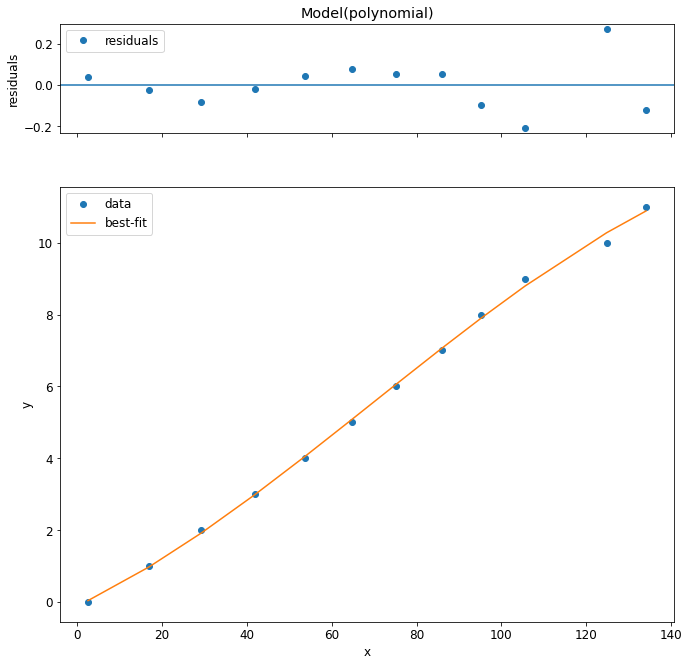

In [9]:
FP_LR_fit = poly_fit_and_plot(FP_LR['Position'],FP_LR['index'])

### Make the calibration function

You can use the same method to make the calibration curve as you used in teh Zeeman effect experiment, e.g., use `eval()` with the fit coefficients.

In [10]:
def cal_LR(x,model=PolynomialModel(degree=3),params=FP_LR_fit):
    return model.eval(params, x=x)
print(cal_LR(120))

9.929543059930705


In [11]:
probe_LR = up.uarray(PB_LR['Position'],PB_LR['Uncertainty'])

Left_Right_spectrum = pd.DataFrame({'Paper': probe_LR,
                                    'FSR': cal_LR(probe_LR),
                                    'MHz': uFSR*cal_LR(probe_LR)/const.mega,
                                    'Rel MHz': uFSR*cal_LR(probe_LR)/const.mega - 4532
                                   })

print('Left-to-right scan probe-beam peak locations:')
Left_Right_spectrum

Left-to-right scan probe-beam peak locations:


,Paper,FSR,MHz,Rel MHz
0,42.30+/-0.05,3.027+/-0.004,4532+/-10,0+/-10
1,83.1+/-0.5,6.80+/-0.04,(1.018+/-0.006)e+04,(5.65+/-0.06)e+03
2,94.5+/-0.5,7.83+/-0.04,(1.173+/-0.007)e+04,(7.20+/-0.07)e+03
3,106.10+/-0.35,8.835+/-0.029,(1.323+/-0.005)e+04,(8.70+/-0.05)e+03
4,112.90+/-0.15,9.387+/-0.012,14057+/-30,9525+/-30


### Calculate separations

* The Lamb shift: 2S<sub>1/2</sub> - 3P<sub>3/2</sub> to 2P<sub>1/2</sub> - 3D<sub>3/2</sub> frequency separation (with uncertainty) for both scans.
* The 2P<sub>3/2</sub>  - 3D<sub>5/2</sub> to 2P<sub>1/2</sub> - 3D<sub>3/2</sub>  frequency separation, i.e., highest frequency peak to lowest frequency peak (with uncertainty) for both scans.
* The 2P<sub>3/2</sub>  - 3D<sub>5/2</sub> to 2S<sub>1/2</sub> - 3P<sub>1/2</sub> frequency separation, i.e., tallest to smallest peak (with uncertaintyl) for both scans.


In [12]:
seps_list = ['2S1/2-3P 3/2 to 2P1/2-3D3/2', '2P3/2-3D5/2 to 2P1/2-3D3/2','2P3/2-3D5/2 to 2S1/2-3P1/2']

rel_MHz_LR = Left_Right_spectrum['MHz']

LR1 = rel_MHz_LR[4]-rel_MHz_LR[3]
LR2 = rel_MHz_LR[4]-rel_MHz_LR[0]
LR3 = rel_MHz_LR[1]-rel_MHz_LR[0]

LR_list = [LR1,LR2,LR3]

Results = pd.DataFrame({'Separations': seps_list,
                            'L-R (MHz)':LR_list})

Results

,Separations,L-R (MHz)
0,2S1/2-3P 3/2 to 2P1/2-3D3/2,(8.3+/-0.5)e+02
1,2P3/2-3D5/2 to 2P1/2-3D3/2,9525+/-25
2,2P3/2-3D5/2 to 2S1/2-3P1/2,(5.65+/-0.06)e+03


## Right-to-left scan analysis

In [13]:
FP_RL['index'] = list(FP_RL.index)
FP_RL

,Peak,Position,index
0,1,10.1,0
1,2,20.3,1
2,3,30.5,2
3,4,41.2,3
4,5,51.7,4
5,6,62.1,5
6,7,72.2,6
7,8,83.8,7
8,9,94.1,8
9,10,105.5,9


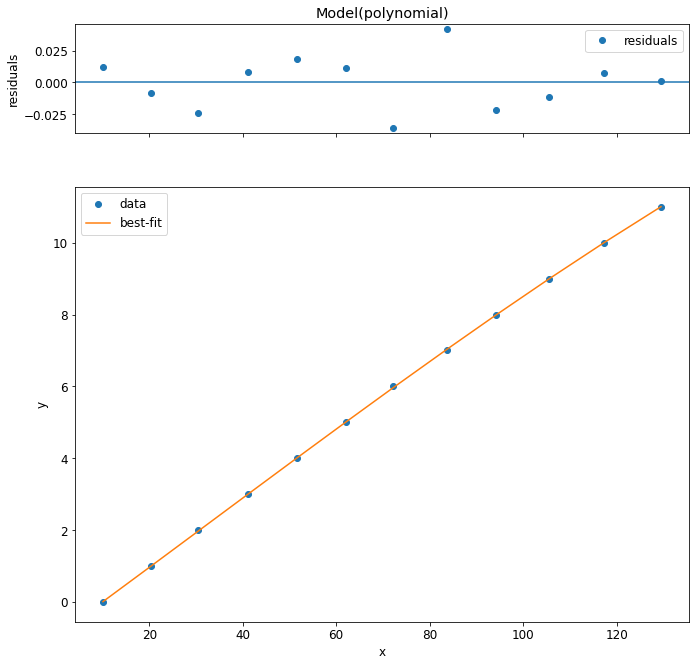

In [14]:
FP_RL_fit = poly_fit_and_plot(FP_RL['Position'],FP_RL['index'])

### Make the calibration for the R-L scan


In [15]:
def cal_RL(x,model=PolynomialModel(degree=3),params=FP_RL_fit):
    return model.eval(params, x=x)

print(cal_RL(120))

10.22496188545882


### Calculate the spectrum

Carry out the calculation and table construction for the right-to-left scan.

In [16]:
probe_RL = up.uarray(PB_RL['Position'],PB_RL['Uncertainty'])

Right_Left_spectrum = pd.DataFrame({'Paper': probe_RL,
                                    'FSR': cal_RL(probe_RL),
                                    'MHz': uFSR*cal_RL(probe_RL)/const.mega,
                                    'Rel MHz': uFSR*cal_RL(probe_RL)/const.mega - 3233
                                   })

print('Right-to-left scan probe-beam peak locations:')
Right_Left_spectrum

Right-to-left scan probe-beam peak locations:


,Paper,FSR,MHz,Rel MHz
0,32.40+/-0.05,2.159+/-0.005,3233+/-9,0+/-9
1,70.90+/-0.20,5.843+/-0.019,8749+/-32,5516+/-32
2,82.7+/-0.5,6.94+/-0.05,(1.039+/-0.007)e+04,(7.16+/-0.07)e+03
3,94.80+/-0.25,8.041+/-0.022,(1.204+/-0.004)e+04,(8.81+/-0.04)e+03
4,102.40+/-0.05,8.717+/-0.004,13053+/-23,9820+/-23


### Calculate separations


Calculate the separations for the right-to-left scan.

Then include this column in the existing DataFrame so that the results can be directly compared

In [17]:
Results['R-L (MHz)'] = ['2P3/2-3D5/2 to 2S1/2-3P1/2', '2P3/2-3D5/2 to 2P1/2-3D3/2','2S1/2-3P3/2 to 2P1/2-3D3/2']

rel_MHz_RL = Right_Left_spectrum['MHz']

RL1 = rel_MHz_RL[4]-rel_MHz_RL[3]
RL2 = rel_MHz_RL[4]-rel_MHz_RL[0]
RL3 = rel_MHz_RL[1]-rel_MHz_RL[0]

Results['R-L (MHz)'] = [RL1,RL2,RL3]

Results['Average'] = [(RL1+LR1)/2, (RL2+LR2)/2, (RL3+LR3)/2]

Results['Expected (MHz)'] = [1058,9890,5583]

Results

,Separations,L-R (MHz),R-L (MHz),Average,Expected (MHz)
0,2S1/2-3P 3/2 to 2P1/2-3D3/2,(8.3+/-0.5)e+02,1012+/-34,919+/-29,1058
1,2P3/2-3D5/2 to 2P1/2-3D3/2,9525+/-25,9820+/-19,9672+/-20,9890
2,2P3/2-3D5/2 to 2S1/2-3P1/2,(5.65+/-0.06)e+03,5516+/-31,(5.58+/-0.04)e+03,5583


In [18]:
print('\n Fine-structure line separation         |  Measured (MHz) |  Best known value (MHz)')
print('----------------------------------------|-----------------|-------------------------')
print('{:s} (Lamb shift)|   {:.2uP}        |   {:.0f}'.format(Results.iloc[0,0],Results['Average'][0],
                                                             Results['Expected (MHz)'][0]))
print('{:s}              |   {:.2uP}       |   {:.0f}'.format(Results.iloc[1,0],Results['Average'][1],
                                                             Results['Expected (MHz)'][1]))
print('{:s}              |   {:.2uP}       |   {:.0f}'.format(Results.iloc[2,0],Results['Average'][2],
                                                             Results['Expected (MHz)'][2]))


 Fine-structure line separation         |  Measured (MHz) |  Best known value (MHz)
----------------------------------------|-----------------|-------------------------
2S1/2-3P 3/2 to 2P1/2-3D3/2 (Lamb shift)|   919±29        |   1058
2P3/2-3D5/2 to 2P1/2-3D3/2              |   9672±20       |   9890
2P3/2-3D5/2 to 2S1/2-3P1/2              |   5581±36       |   5583
